<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/Potato/Group_Potato_Msia_Death_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name :

      Kong Jia Rou   (A20EC0198)
      Yong Zhi Yan   (A20EC0172)

# **Death by state, sex and age group Malaysia 2001-2018**

In this project, we will be using the dataset, *Death by state, sex and age group Malaysia 2001-2018* retrieved from Department of Statistics Malaysia. 

Objectives :

*   To investigate the top 5 age group according to the mean number of deaths
*   To study the highest number of deaths each year
*   To examine the total number of death in every state
*   To explore the relationship between age group and the number of death
*   To find the relationship between sex and the number of death






## Downloading the Dataset
 

1.   To begin this project, download the dataset from the link [Dataset : Death by state, sex and age group Malaysia 2001-2018.](https://www.dosm.gov.my/v1/index.php?r=column/cone&menu_id=dC9JU2RhZk9HNmxQS3hTOStuMVVLdz09)

2.  Convert the dataset file to .csv format.

3. Upload the file to GitHub repository. The dataset can be accessed from [here.](https://raw.githubusercontent.com/drshahizan/Python_EDA/main/Malaysia%20EDA/Potato/Death_by_state_sex_and_age_group_Malaysia_2001-2018.csv) 






## Data Preparation and Cleaning
Data preparation is the process of transforming raw data prior to processing and analysis. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.It is an important step prior to processing and often involves reformatting data, making corrections to data, and combining datasets to enrich data.


First, import the library. We will be using pandas to read CSV file.

In [5]:
import pandas as pd

Read the CSV file. You could see the sample of the DataFrame with head().

In [6]:
url = 'https://raw.githubusercontent.com/drshahizan/Python_EDA/main/Malaysia%20EDA/Potato/Death_by_state_sex_and_age_group_Malaysia_2001-2018.csv'
dataset = pd.read_csv(url)
dataset.head()

,Sex,Age group,Year,State,Number of death
0,Male,Under 1 year,2001,Johor,263.0
1,Male,Under 1 year,2001,Kedah,173.0
2,Male,Under 1 year,2001,Kelantan,198.0
3,Male,Under 1 year,2001,Melaka,59.0
4,Male,Under 1 year,2001,Negeri Sembilan,69.0


By using the .shape attribute, we can see the dataframe dimensionality. The result is a tuple containing the number of rows and columns.



*   In this dataset, we have 1,1040 rows and 5 columns.

In [7]:
dataset.shape

(11040, 5)

By using .info attribute, we can see the overview of every columns information the dataset.

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              11040 non-null  object 
 1   Age group        11040 non-null  object 
 2   Year             11040 non-null  int64  
 3   State            11040 non-null  object 
 4   Number of death  10445 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 431.4+ KB


Next, we will be identifying whether there is any ocurrence of missing value in the dataset.

In [9]:
dataset.isna().sum()

Sex                  0
Age group            0
Year                 0
State                0
Number of death    595
dtype: int64

There is a total of 595 records of missing value found under the number of death column. To solve this problem, we will replace the missing value with the mean of the number of death and convert the data type to integer. 

In [10]:
dataset['Number of death'] = pd.to_numeric(dataset['Number of death'],errors='coerce')
dataset['Number of death'].fillna(int(dataset['Number of death'].mean()), inplace=True)
dataset['Number of death'] = dataset['Number of death'].astype(int)

Check again to ensure there is no missing value occur in the dataset.

In [11]:
dataset.isna().sum()

Sex                0
Age group          0
Year               0
State              0
Number of death    0
dtype: int64

From the output above, we can conclude that there are no missing values in the dataset. The dataset is ready for the next step.

## Exploratory Analysis and Visualization

Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
dataset.describe()

,Year,Number of death
count,11040.000000,11040.000000
mean,2009.695652,221.879438
std,5.236688,265.610232
min,2001.000000,0.000000
25%,2005.000000,29.000000
50%,2010.000000,126.000000
75%,2014.000000,301.000000
max,2018.000000,1835.000000


###1. Bar Chart : Number of Death per Year

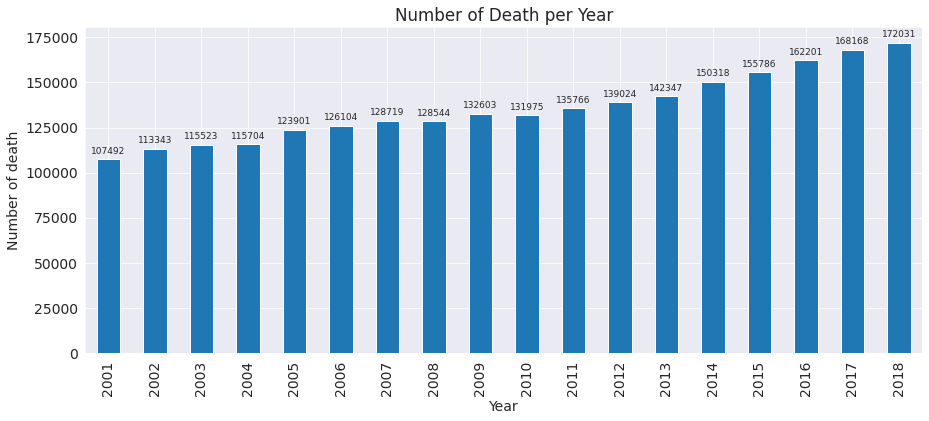

In [14]:
plt.figure(figsize=(15,6))

sum_of_death = dataset.groupby('Year')['Number of death'].sum()

plt.ylabel('Number of death')
plt.title('Number of Death per Year')
bar_chart = sum_of_death.plot.bar()

for bar in bar_chart.patches:
  bar_chart.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

The bar chart above shows the number of death per year in Malaysia. From the chart above, we can conclude that the number of death rises steadily with a percentage of 60.04% from 2001 (107492 deaths) to 2018 (172031 deaths). This indicates that within just 18 years, the rate of death in Malaysia had drastically increased over 60%, which is considered as a huge rise, thus immediate attention must be given in investigating the reason behind this.


###2. Line Chart : Number of Death per Year in each State

Text(0.5, 1.0, 'Number of Death per Year in each State')

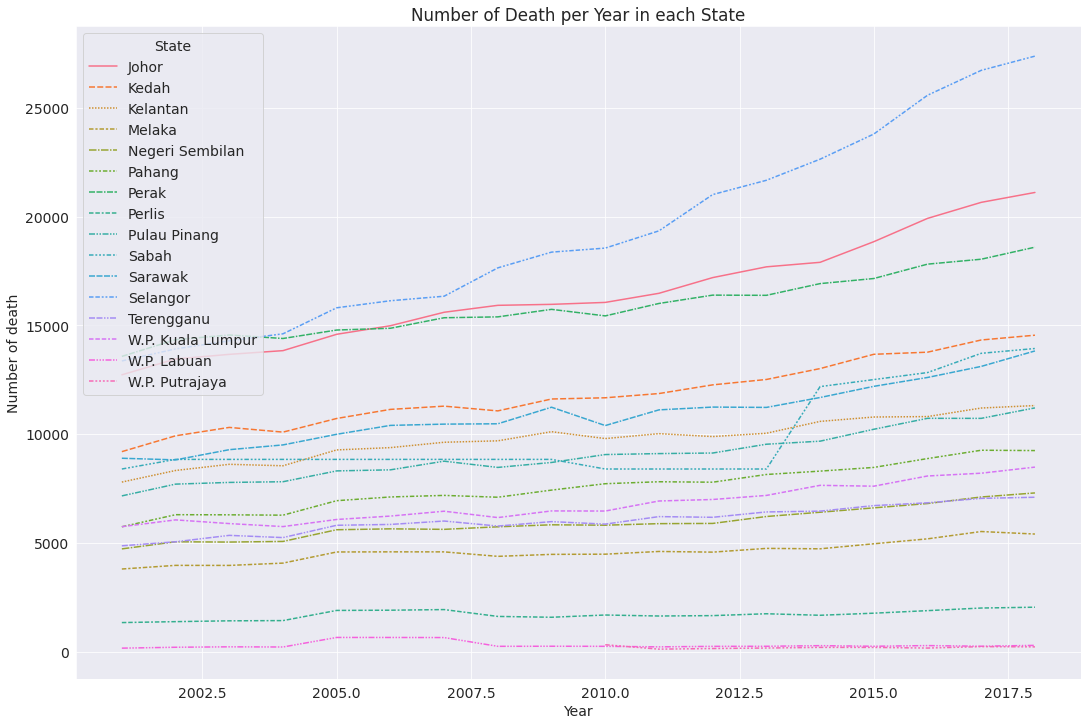

In [15]:
plt.figure(figsize=(18,12))

death_by_state = dataset.groupby(['Year','State'], as_index=False)['Number of death'].sum()

sns.lineplot(data = death_by_state, x ='Year', y='Number of death', hue='State', style='State')
plt.title('Number of Death per Year in each State')

The line chart above shows the number of death from 2001 to 2018 according to the state. Selangor, Johor and Perak are the top three states with the highest record of deaths, whereas Perlis, W.P. Labuan and W.P. Putrajaya have lowest record of deaths throughout the 18 years between 2001 and 2018. According to the line chart above, Selangor has shown a drastic increase in number of deaths, which doubled over just 18 years, the reason behind this figure is yet to be figured out. 

###3. Box Plot : Number of Death According to Gender

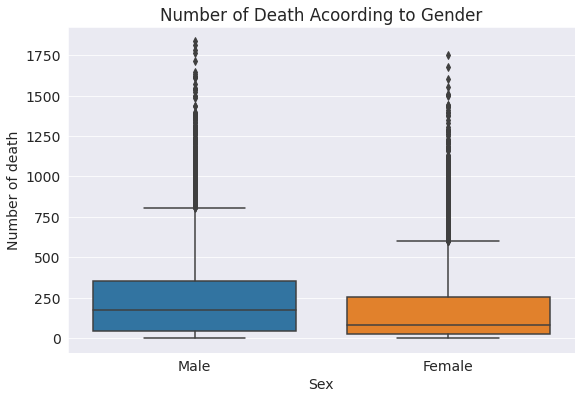

In [16]:
plt.figure(figsize = (20, 6))
plt.subplot(1,2,1)
sns.boxplot(x = 'Sex', y = 'Number of death', data = dataset)
plt.title('Number of Death Acoording to Gender')
plt.show()

The box plot above shows the number of death according to gender. Overall, male has higher number of death compared to female, since the median of male is slightly higher than that of female. Both male and female's whisker plot have shown a significant amount of outliers, this indicates that there exists other factors which affect the number of death to be higher than the upper fence of the box plot. 

###4. Pie Chart : Number of Death According to Age Group 

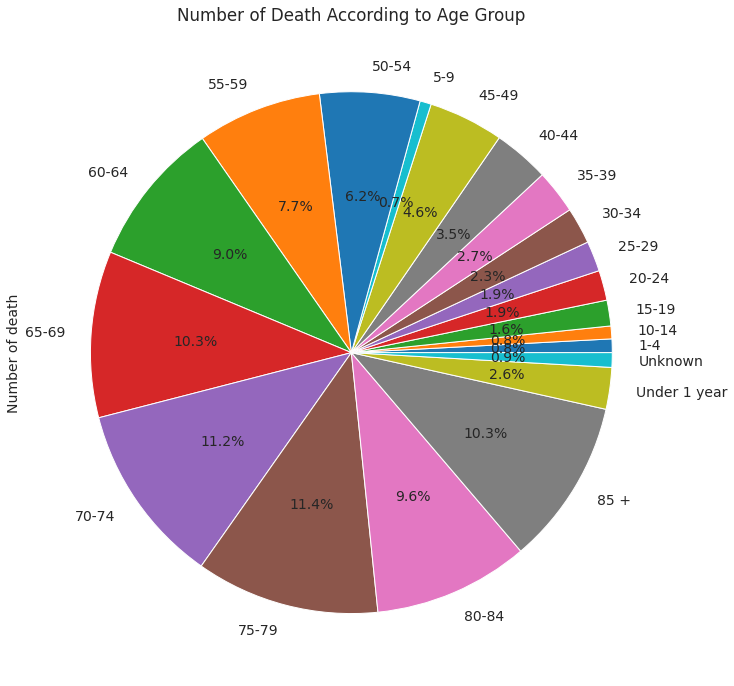

In [17]:
plt.figure(figsize = (12, 12))
data = dataset.groupby('Age group')['Number of death'].sum()
plt.title('Number of Death According to Age Group')
data.plot.pie(autopct='%.1f%%')

The pie chart above shows the number of death of each age group. From the chart, we can conclude that the age group with 50 years old and above contibutes over 5% respectively in the overall data. A total 75.7% of the number of death came from the age group of 50 and above, hence we can say that citizens with 50 years old and above are more likely to end their lives due to sickness, aging and etc. Other than that, infants under 1 year old also contributed a total of 2.6% to the overall death rate. This indicates infants with weak immune system are more likely to die due to disease, sickness and etc. 

###5. Kernel Density Estimation Chart

Kernel density estimation is a useful statistical method to estimate the overall shape of a random variable distribution. In other words, kernel density estimation (KDE) helps to “smooth” and explore data that does not follow any typical probability density distribution, such as normal distribution, binomial distribution and more.

Text(0.5, 1.0, 'Kernel Density Estimatation Chart for Number of Death')

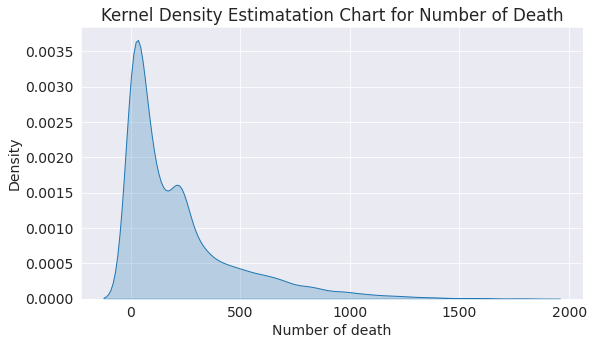

In [18]:
sns.kdeplot(dataset['Number of death'], shade=True)
plt.title('Kernel Density Estimatation Chart for Number of Death')

The kernel density estimation chart shows the density of the distribution of number of death throughout the dataset. We can conclude that majority number of deaths are within 500 from the skewness of the distribution. 

## Asking and Answering Questions

In this part, we will be achieving the objectives of this project by answering the objectives. To answer the objectives, we will compute the results using Numpy/Pandas and plotting the graphs using Matplotlib/Seaborn.



#### Q1: Investigating the top 5 age group according to the highest mean number of deaths

In [19]:
top_agegroup = dataset.groupby(['Age group'], as_index=False)['Number of death'].mean()
top_agegroup = top_agegroup.sort_values(by=['Number of death'], ascending=False)[:5]
print(top_agegroup)

   Age group  Number of death
15     75-79       499.727599
14     70-74       492.763441
13     65-69       452.318996
17      85 +       450.879928
16     80-84       422.213262


According to the dataset, citizens who aged between 75 to 79 have the highest mean number of death, followed by those who aged between 70 to 74, 65 to 69, 85 and above, and 80 to 84. These age groups have doubled mean values compared to the overall mean value (221.88) as mentioned before. This indicates citizens who are 65 and above are more likely to go to heaven soon or later. 

#### Q2: Studying the highest number of deaths of each year

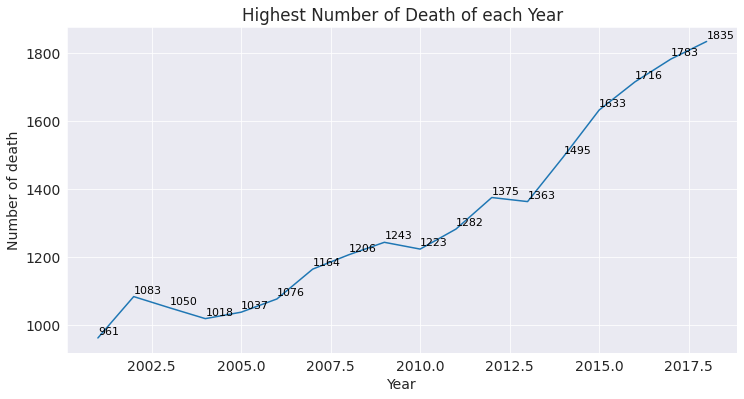

In [20]:
plt.figure(figsize=(12,6))

max_num = dataset.groupby(['Year'], as_index=False)['Number of death'].max()
sns.lineplot(data = max_num, x ='Year', y='Number of death')
plt.title('Highest Number of Death of each Year')

for x, y in zip(max_num['Year'], max_num['Number of death']):
  plt.text(x = x, y = y+10, s = '{:.0f}'.format(y), color = 'black', size = 11)

According to the line chart above, the highest number of death from year 2001 to 2013 fluctuated slightly, then rose steadily until year 2018. Overall, the highest number of death shows a increasing trend over the years. 

#### Q3: Examining the total number of death in every state

<Figure size 1440x432 with 0 Axes>

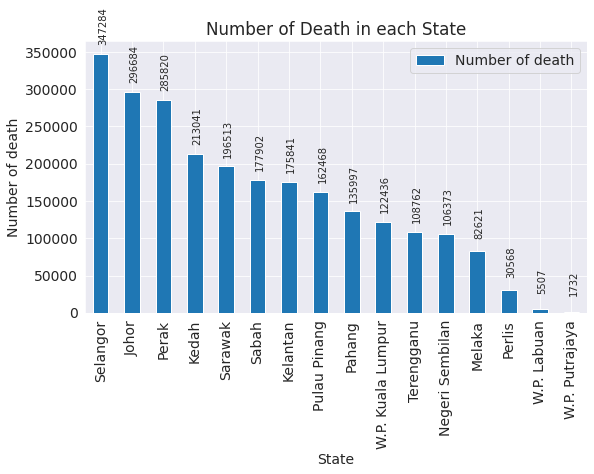

In [21]:
plt.figure(figsize=(20,6))

sum_by_state = dataset.groupby(['State'], as_index=False)['Number of death'].sum().sort_values(by=['Number of death'], ascending=False)

bar_chart = sum_by_state.plot.bar(x='State')
plt.xlabel('State')
plt.ylabel('Number of death')
plt.title('Number of Death in each State')

for bar in bar_chart.patches:
  bar_chart.annotate(bar.get_height(), (bar.get_x(), bar.get_height()), ha='center', va='center',
                   size=10, xytext=(10,28), rotation='vertical',
                   textcoords='offset points')

According to the bar chart above, Selangor has the highest cummulative record of deaths within year 2001 and 2018, followed by Johor, Perak, Kedah and so on. Meanwhile, both W.P. Labuan and W.P. Putrajaya had been recorded not more than ten thousands of deaths within these 18 years.

#### Q4: Exploring the relationship between age group and the number of death

In [22]:
from scipy.stats import f_oneway
 
# Running the one-way anova test between Age group and Number of death
# Assumption(H0) is that Age group and Number of death are NOT correlated
 
# Finds out the Number of death data for each Age group as a list
CategoryGroupLists=dataset.groupby('Age group')['Number of death'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


As the output of the P-value is almost zero, hence, we reject H0. This means the number of death and age group are correlated with each other.

#### Q5: Finding the relationship between sex and the number of death

In [23]:
# Running the one-way anova test between Sex and Number of death
# Assumption(H0) is that Sex and Number of death are NOT correlated
 
# Finds out the Number of death data for each Sex as a list
CategoryGroupLists=dataset.groupby('Sex')['Number of death'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  3.8477874546690414e-36


As the output of the P-value is almost zero, hence, we reject H0. This means the number of death and sex are correlated with each other.

## Inferences and Conclusion


From the analysis of the Malaysia's death statistics from 2001 to 2018, a few inferences can be made. We found that the number of death is highly depend on the age, statistics shows that citizens who aged 50 and above have high possibility (over 75% of the number of death) to die soon or in future later. We are surprised by the fact that infants below one year old contributed a 2.6% to the overall death rate. We also shocked by the fact that the number of death increased by years, and within 18 years there was 60% increment in the total number of death. The reason behind this drastic increment is yet to be investigate and we believe that it will not be easy to cope with the truth behind this. 


Other than that, we observe that male has slightly higher records of death compared to female. Besides that, we noted that Selangor had the highest number of death within the 18 years, but in contrast, W.P. Putrajaya had the lowest number of death. We think that it is worth to carry out further investigation on the reason behind these number, as we know Selangor and W.P. Putrajaya actually is very near to each other, but what makes the number of death such huge difference among them. Lastly, we observe that age and sex do affect the number of death. 


In conclusion, the number of death had increased from 2001 to 2018 with majority death of old forks, and highest death rate in Selangor. 

## References and Future Work



*   Determining the correlation between two variables using ANOVA. One-way ANOVA (also known as “analysis of variance”) is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group.        Reference : https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

*   Exploratory Data Analysis helps in identifying any outlier data points, understanding the relationships between the various attributes and structure of the data, recognizing the important variables. It helps in framing questions and visualizing the results, paving the way to make an informed choice of the machine learning algorithm for the problem at hand. Reference : https://www.analyticsvidhya.com/blog/2022/03/exploratory-data-analysis-with-an-example/


